25.01.2021

Image Processing in Physics, TUM

Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiß

# Exercise 2: Single-shot phase retrieval

Here, we apply the grid-based phase retrieval method of M. Takeda.
Unlike the grating-based stepping method from exercise 1, this
method requires the acquisition of only one image, albeit at the
expense of some resolution.

The procedure is outlined below.

![title](grid.png)

In the present case, we have a 2D grid, and we thus get extra
side peaks also in vertical direction.

Isolating a vertical side peak would allow us to extract vertical
refraction angles, but we ignore that for the present exercise.

The procedure is thus:

1. Take Fourier transform of both image (with and without object)
2. Cut out the frequencies around the grid frequency in x-direction
   (i.e. a horizontal side peak)
3. Extract the differential images (via inverse FFT and calculating
   the phase)
4. Correct for background phase variations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load the image with the ant and the grid and the flatfield containing only
the grid from the given files.

In [2]:
image = np.load('grid_ant.npy')  # Grid with ant
flatfield = np.load('grid_background.npy')  # Only grid

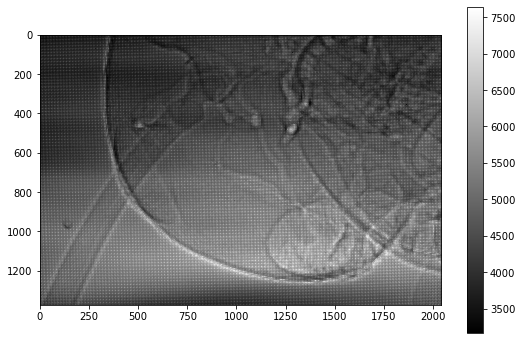

In [3]:
plt.figure(1, figsize=(9,6))
plt.imshow(image, cmap='gray', interpolation='none')
plt.colorbar()

Take the 2D Fourier transform of both images and shift the zero frequency to
the center:

In [4]:
image_fft = np.fft.fftshift(np.fft.fft2(image))
flatfield_fft = np.fft.fftshift(np.fft.fft2(flatfield))

Plot the logarithm of the absolute value for the image with the ant:

<IPython.core.display.Javascript object>


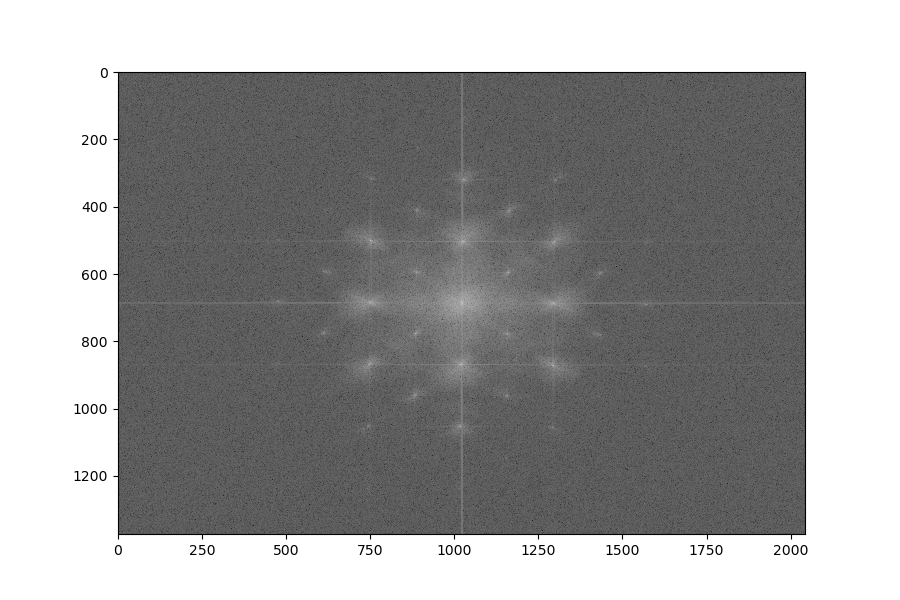

In [5]:
%matplotlib notebook
# 684, 747
plt.figure(2, figsize=(9,6))
plt.imshow(np.log(np.abs(image_fft)), cmap='gray', interpolation='none')



Crop the Fourier transforms to the area required to extract the phase
gradient around the peak position of the grid in x-direction.

You can do the same for the frequency peak in y-direction,
but we will omit this in this exercise.
Choose the section for yourself.

**Hints:**
* Use the locations of the central and side peaks in the above figure
  to determine the cropping limits! Zoom into the previous figure
  to obtain exact values. (For Jupyter notebook, the frontend was changed
  so you can zoom with this button:![rectangle](rect.png).)
* The width of the cropping area should be equal to the horizontal
  distance of the main peaks, and the height of the area equal to
  the vertical distance of side peak to main peak.
* The cropping limits must be integer values!

In [20]:
x_sidepeak = 747
x_center = 1021
width = x_center - x_sidepeak
y_sidepeak = 502
y_center = 686
height = y_center - y_sidepeak
sl = np.s_[y_center - height //2 : y_center + height // 2,
           x_center - 3 * width // 2:x_center - width // 2]

print(sl)
image_fft_crop = image_fft[sl]
flatfield_fft_crop = flatfield_fft[sl]

(slice(594, 778, None), slice(610, 884, None))


Plot the logarithm of the absolute value of the cropped Fourier transform for
the image with the ant. Check if you have cropped the correct region.

<IPython.core.display.Javascript object>


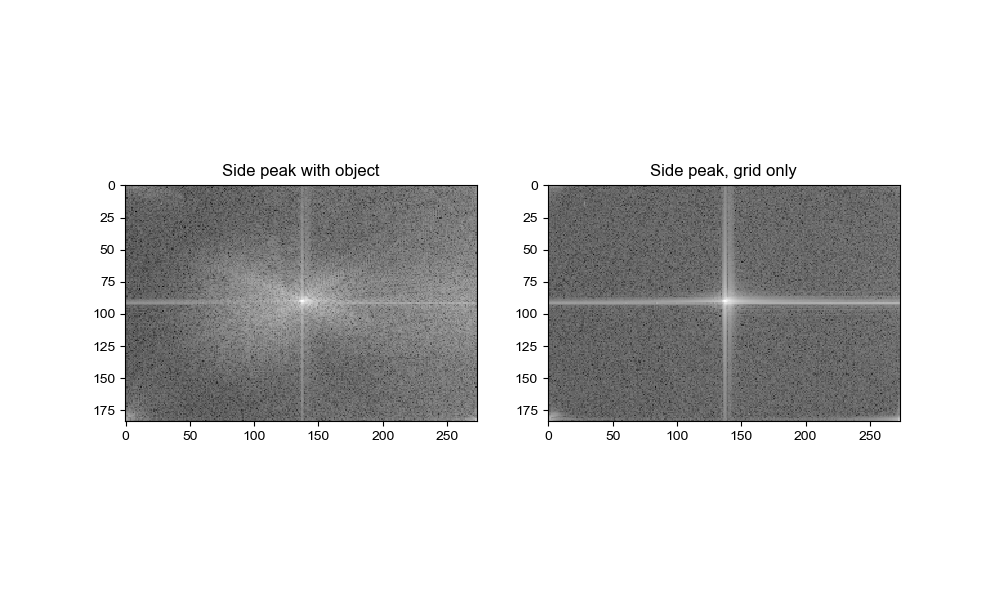

In [18]:
plt.figure(3, figsize=(10,6))
plt.subplot(121); plt.title('Side peak with object')
plt.imshow(np.log(np.abs(image_fft_crop)), cmap='gray')
plt.subplot(122); plt.title('Side peak, grid only')
plt.imshow(np.log(np.abs(flatfield_fft_crop)), cmap='gray')

Extract the phase gradients (non-quantitative) in x-direction from
the cropped Fourier transform. Therefore, perform the inverse Fourier
transform of the cropped image with the ant and extract the phase.

**Hint:** use the function `np.angle()` to extract the phase!

In [8]:
image_ifft_crop = np.fft.ifft2(np.fft.ifftshift(image_fft_crop))
image_phase = np.angle(image_ifft_crop)

Do the same for the flatfield:

In [9]:
flatfield_ifft_crop = np.fft.ifft2(np.fft.ifftshift(flatfield_fft_crop))
flatfield_phase = np.angle(flatfield_ifft_crop)

Subtract the background phase gradient calculated from the grid-only image:

In [10]:
corrected = image_phase - flatfield_phase

As in Ex. 1, use the `wrap_phase()` function to map all phase values to $[-\pi, \pi]$:

In [11]:
def wrap_phase(inarray):
    outarray = np.angle(np.exp(1j * inarray))
    return outarray

In [13]:
corrected = wrap_phase(corrected)

Compare the results to the image given in the lecture.
In the lecture slides, the contrast may be inverted.

<IPython.core.display.Javascript object>


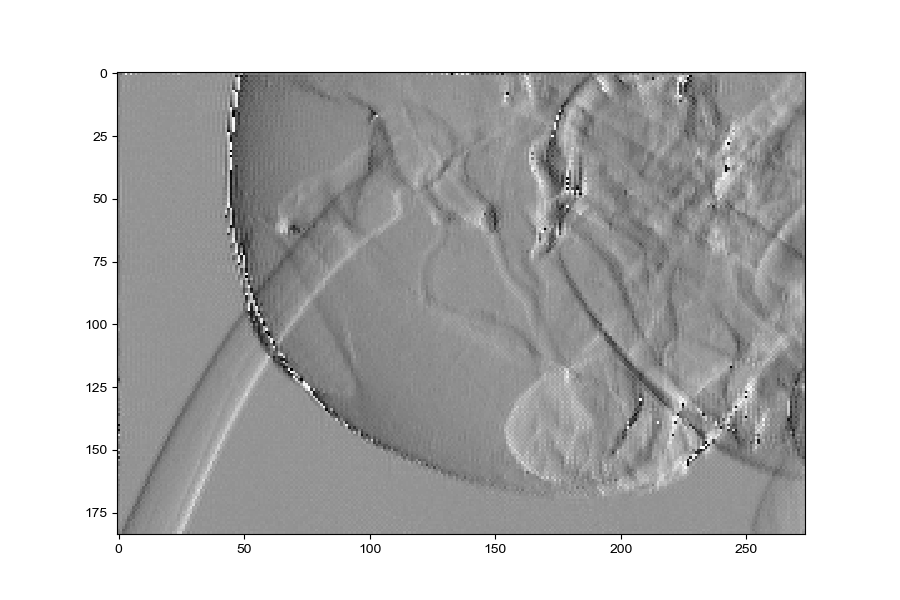

In [15]:
plt.figure(4, figsize=(9,6))
plt.imshow(wrap_phase(corrected), cmap='gray')